In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('Salida3.csv')

C:\Users\rodri\AppData\Local\Temp\ipykernel_12012\1392113455.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


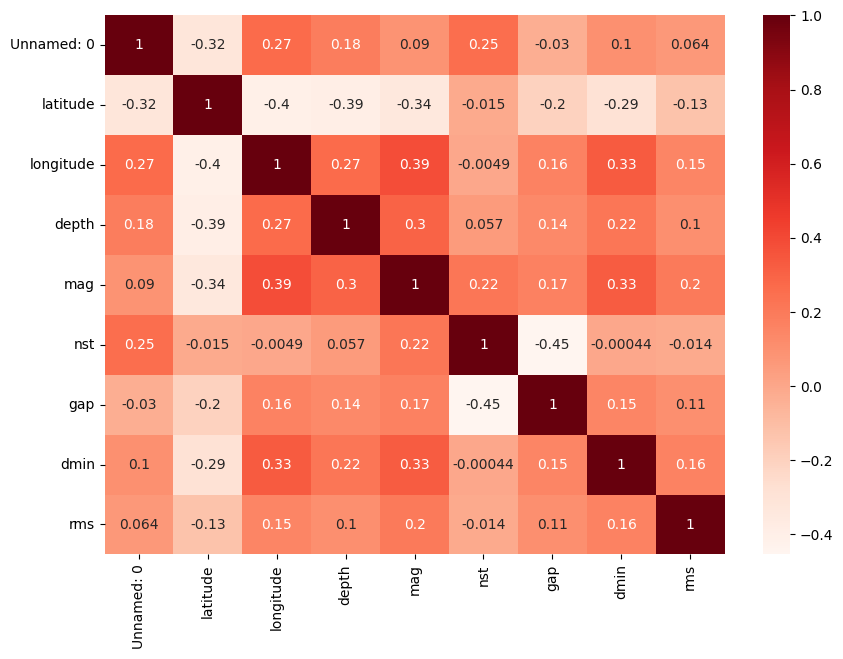

In [16]:
plt.figure(figsize = (10, 7))
cor = df.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

In [17]:
condiciones = [
    (df['mag'] < 4),
    (df['mag'] >= 4) & (df['mag'] < 7),
    (df['mag'] >= 7)
]

opciones = 0, 1, 2

df['target'] = np.select(condiciones, opciones)

In [18]:
df.drop(columns = ['Unnamed: 0', 'time', 'latitude', 'longitude', 'magType', 
                   'net', 'place', 'type'], axis = 1, inplace = True)

In [19]:
columnas_x = ['depth', 'mag']
columnas_y = ['target']

X = df.loc[:, columnas_x]
y = df.loc[:, columnas_y]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

lin_reg = LinearRegression()
log_reg = LogisticRegression()
svc_m = SVC()

In [21]:
lin_regr = lin_reg.fit(x_train, y_train)
log_regr = log_reg.fit(x_train, y_train)
svc_mo = svc_m.fit(x_train, y_train)

c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed w

In [22]:
with open('lin_reg.pkl', 'wb') as li:
    pickle.dump(lin_reg, li)

with open('log_reg.pkl', 'wb') as lo:
    pickle.dump(log_reg, lo)

with open('svc_m.pkl', 'wb') as sv:
    pickle.dump(svc_m, sv)